In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

import torch
import torch_geometric
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric import nn as gnn

from graph_vae import GraphVAE
from train import train_loop, loss_infer
from data_load import *

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

## Model Definition and training

In [3]:
net = GraphVAE()
net.load_state_dict(torch.load("Saves/ep_25.pth"))

<All keys matched successfully>

In [4]:
net = net.to(device)

In [5]:
train_loop(net, 1, 200, 1e-3, device)

Epoch : 1 Loss: 0.0901 E mse: 0.0003 Hit mse: 0.0706


In [4]:
torch.save(net.state_dict(), "Saves/L_50k_norand.pth")

tensor(0.0100)

## Inference and tests

In [2]:
from data_load import get_train_dataset

In [6]:
# def reconstruct_img(Y, counts):
#     xhit, yhit = Y[:, :, 0], Y[:, :, 1]
#     val = Y[:, :, 2]/50.
    
#     xhit = (xhit % 125).int()
#     yhit = (yhit % 125).int()
    
#     ecal = torch.zeros((Y.shape[0], 125, 125))
#     for j in range(Y.shape[0]):
#         # Add fancy/optimized indexing later
#         for i in range(counts[j]):
#             ecal[j, xhit[j, i], yhit[j, i]] += 0.1*(i/counts[j])# val[j, i]
    
#     return ecal

# def loss_infer2(net, x):
#     """
#     Inference loss function
#     """
#     # Graph nodes and edges
#     X, A, mask, counts = preprocess(x)
#     # Reconstructed nodes and edges
#     Y, A2, mu, logvar, L1, L2 = net(X, A, mask)
    
#     # Convert back to image
#     ecal = reconstruct_img(Y, counts)
    
#     mse = torch.nn.MSELoss()
    
#     return mse(X, Y), ecal, counts
    

In [4]:
net = GraphVAE()
net.load_state_dict(torch.load("Saves/Checkpoints/ep_15.pth"))

<All keys matched successfully>

In [5]:
dataset = get_train_dataset(600)
dataloader = torch.utils.data.DataLoader(dataset, 200, True)

In [7]:
for (x,) in dataloader:
    img1 = x[:, :, :, 1]
    with torch.no_grad():
        L, img2, counts = loss_infer2(net, x)
    break

In [8]:
img2.max()

tensor(0.7687)

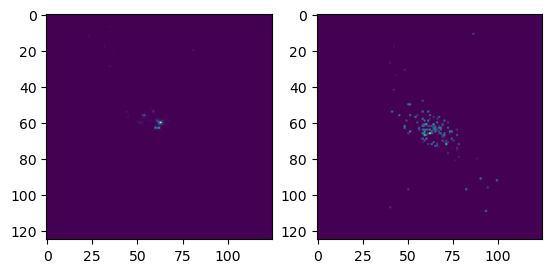

In [9]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1[3]*(256))
ax[1].imshow(img2[3]*(256))
plt.show()

## Scratchpad

In [3]:
type(np.minimum(1000, 1012))

numpy.int64

In [16]:
x = torch.randn(100, 50, 3)
indx = torch.argsort(x[:, :, 2], descending=True)

In [17]:
batch, nodes = x.shape[0], x.shape[1]

# Change to 1d
kappa = nodes*torch.arange(batch).unsqueeze(1)
indx2 = torch.flatten(kappa + indx)
x2 = torch.flatten(x, 0, 1)[indx2, :].reshape((batch, nodes, 3))

In [28]:
A = torch.rand(100, 50, 50)

# Get indices to sort dim=1,2 of A
indx3 = ((kappa+indx)*torch.arange(nodes)).unsqueeze(2)
indx3 = indx3 + indx.unsqueeze(1)
# Flatten A, sort, and get it back to shape
A = torch.flatten(A)[indx3].reshape(A.shape)

In [29]:
A.shape

torch.Size([100, 50, 50])

In [8]:
X, mask = to_dense_batch(G, lengs, fill_value=0, max_num_nodes=1000)
A = to_dense_adj(E, lengs, max_num_nodes=1000) # (batch, 1000, 1000)


In [9]:
X = X
A = A
X.shape, A.shape

(torch.Size([2, 1000, 3]), torch.Size([2, 1000, 1000]))

In [12]:
net = GraphVAE(3, 16, 3)
net

GraphVAE(
  (sage): ModuleList(
    (0): DenseSAGEConv(3, 16)
    (1): DenseSAGEConv(16, 16)
    (2): DenseSAGEConv(16, 3)
  )
  (drop): ModuleList(
    (0): Dropout(p=0.5, inplace=False)
    (1): Dropout(p=0.4, inplace=False)
    (2): Dropout(p=0.3, inplace=False)
  )
  (batch_norm): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool): ModuleList(
    (0): MinCut_Pool(
      (linear): Linear(in_features=16, out_features=500, bias=True)
    )
    (1): MinCut_Pool(
      (linear): Linear(in_features=16, out_features=250, bias=True)
    )
  )
  (tr_mu): Linear(in_features=3, out_features=16, bias=True)
  (tr_var): Linear(in_features=3, out_features=16, bias=True)
  (tr_rev): Linear(in_features=16, out_features=3, bias=True)
  (revsage): ModuleList(

In [42]:
Z, A, mu, logvar, L1, L2 = net(X, A)

In [43]:
Z.shape, A.shape

(torch.Size([2, 1000, 3]), torch.Size([2, 1000, 1000]))